In [148]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_ids = test["PassengerId"]

In [ ]:
data.head(5)

In [ ]:
data.hist("Age")    

In [ ]:
sns.displot(data['Age'])

In [ ]:
sns.countplot(x = 'Survived', data = data)

In [ ]:
sns.countplot(x = 'Survived', data = data, hue = 'Pclass')

In [ ]:
sns.countplot(x = 'Pclass', data = data, hue = 'SibSp')

In [ ]:
sns.boxplot(x = 'Pclass', y = 'Age', data = data)

# Data Cleaning

In [ ]:
data.isnull().sum()

In [ ]:
data.info()

In [ ]:
print(data[data  ['Pclass'] == 1]['Age'].mean())
print(data[data  ['Pclass'] == 2]['Age'].mean())
print(data[data  ['Pclass'] == 3]['Age'].mean())

In [ ]:
def fill_na_values(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return round(data[data['Pclass'] == 1]['Age'].mean())
        elif pclass == 2:
            return round(data[data['Pclass'] == 2]['Age'].mean())
        elif pclass == 3:
            return round(data[data['Pclass'] == 3]['Age'].mean())
    else:
        return age

data['Age'] = data[['Age', 'Pclass']].apply(fill_na_values, axis=1)
test['Age'] = test[['Age', 'Pclass']].apply(fill_na_values, axis=1)

            

In [ ]:
data.isnull().sum()

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
data.drop(['Ticket', 'Name', 'PassengerId', 'Cabin'], axis=1, inplace=True)

In [ ]:
test.drop(['Ticket', 'Name', 'PassengerId', 'Cabin'], axis=1, inplace=True)

In [ ]:
data.isnull().sum()

In [ ]:
data.head(10)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ['Sex']

for col in cols:
    data[col] = le.fit_transform(data[col])
    test[col] = le.transform(test[col])
    print(le.classes_)
    
# sex = pd.get_dummies(data['Sex'], drop_first=True)
# data.drop = ['Sex'], axis=1, inplace=True)
# data = pd.concat([data, sex], axis=1)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ['Embarked']

for col in cols:
    data[col] = le.fit_transform(data[col])
    test[col] = le.transform(test[col])
    print(le.classes_)

# embarked = pd.get_dummies(data['Embarked'], drop_first= True)
# data.drop = ['Embarked'], axis=1, inplace=True)
# data = pd.concat([data, embarked], axis=1)

In [ ]:
data.head(5)

In [ ]:
test.isnull().sum()

In [ ]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [ ]:
test.isnull().sum()

# Data Model

Split into Train and Test

In [131]:
from sklearn.model_selection import train_test_split

y = data["Survived"]
X = data.drop("Survived", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

Logistic Regression

In [163]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, max_iter=1000)
lr.fit(X_train, y_train)

lr_predictions = lr.predict(X_test)

print(classification_report(y_test, lr_predictions))
print(confusion_matrix(y_test, lr_predictions))


              precision    recall  f1-score   support

           0       0.90      0.85      0.88        54
           1       0.79      0.86      0.83        36

    accuracy                           0.86        90
   macro avg       0.85      0.86      0.85        90
weighted avg       0.86      0.86      0.86        90

[[46  8]
 [ 5 31]]


MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

predictions = svm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.5, 1, 10, 50, 100, 1000], 'gamma':[1, 0.1, 0.001, 0.0001, 0.00001, 0.000001]}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_test)

In [129]:
print(classification_report(y_test, grid_predictions))
print(confusion_matrix(y_test, grid_predictions))


              precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.79      0.83      0.81        36

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.85      0.84      0.85        90

[[46  8]
 [ 6 30]]


K neighbours 

In [157]:
from sklearn.neighbors import KNeighborsClassifier

error_list = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_predictions = knn.predict(X_test)
    error_list.append(np.mean(knn_predictions != y_test))

i = np.argmin(error_list)
knn = KNeighborsClassifier(n_neighbors=i)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

print(classification_report(y_test, knn_predictions))
print(confusion_matrix(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        54
           1       0.87      0.56      0.68        36

    accuracy                           0.79        90
   macro avg       0.82      0.75      0.76        90
weighted avg       0.80      0.79      0.78        90

[[51  3]
 [16 20]]


12

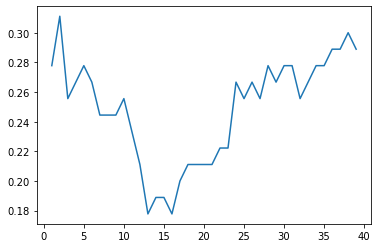

In [154]:
plt.plot(range(1,40), error_list)
np.argmin(error_list)

Decision Tree Classifier

In [160]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train, y_train)

dt_predictions = dt.predict(X_test)

print(classification_report(y_test, dt_predictions))
print(confusion_matrix(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.88      0.80      0.83        54
           1       0.73      0.83      0.78        36

    accuracy                           0.81        90
   macro avg       0.80      0.81      0.81        90
weighted avg       0.82      0.81      0.81        90

[[43 11]
 [ 6 30]]


In [162]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X_train, y_train)

rfc_predictions = rfc.predict(X_test)

print(classification_report(y_test, rfc_predictions))
print(confusion_matrix(y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        54
           1       0.77      0.83      0.80        36

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90

[[45  9]
 [ 6 30]]


# Kaggle Submission

In [167]:
submission_preds = lr.predict(test)

df = pd.DataFrame({"PassengerId": test_ids.values,
                  "Survived" : submission_preds,
                 })

df.to_csv("submission_lr.csv", index=False)

In [171]:
submission_preds = knn.predict(test)

df = pd.DataFrame({"PassengerId": test_ids.values,
                  "Survived" : submission_preds,
                 })
df.to_csv("submission_knn.csv", index=False)